Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
data <- read.csv('Loan payments data.csv')

In [3]:
data %>% head(10)

Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NA,45,High School or Below,male
xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NA,50,Bechalor,female
xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NA,33,Bechalor,female
xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NA,27,college,male
xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NA,28,college,female
xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NA,35,Master or Above,male
xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NA,29,college,male
xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NA,36,college,male
xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NA,28,college,male
xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NA,26,college,male


In [15]:
difftime(lubridate::mdy('9/8/2016'), lubridate::mdy('9/14/2016'),  units = "days") %>% as.numeric

[1] -6

In [18]:
data %>% group_by(loan_status) %>%
    summarise(
        vol = n()
    )

loan_status,vol
COLLECTION,100
COLLECTION_PAIDOFF,100
PAIDOFF,300


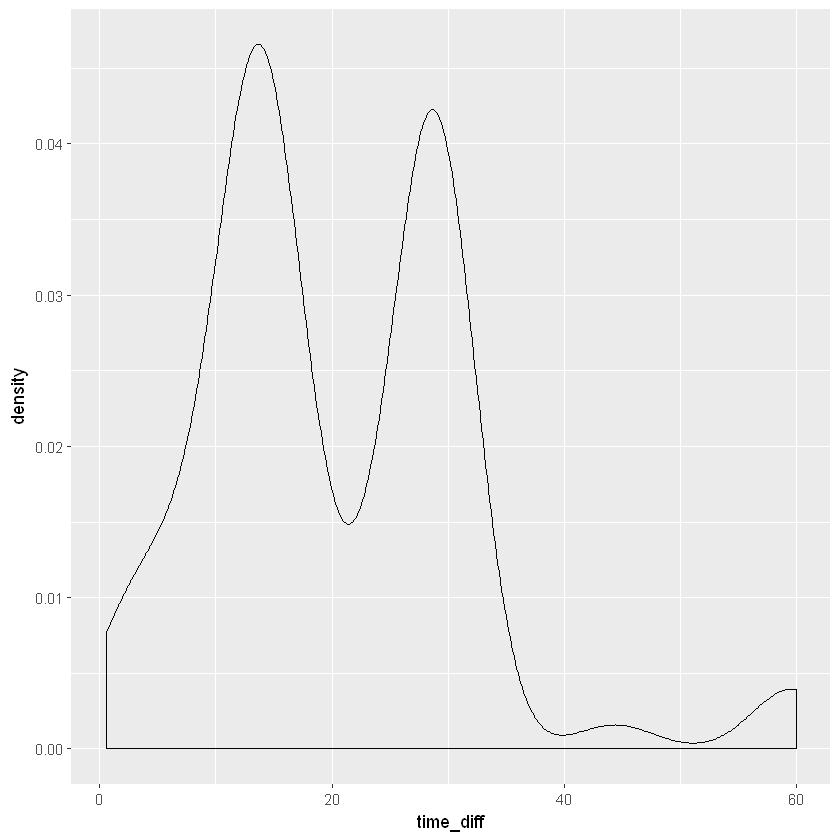

In [52]:
data %>% mutate(time_diff = -1*difftime(lubridate::mdy(effective_date),lubridate::mdy_hm(paid_off_time),units="days") %>% as.numeric ) %>%
    filter(loan_status == 'PAIDOFF') %>%
ggplot(aes(x=time_diff)) + geom_density()

In [56]:
? cut

In [46]:
which.max( seq(from = 0,to=60,by = 5) > 5 )*5 - 10

[1] 5

Warning message:
"Removed 1 rows containing missing values (geom_point)."

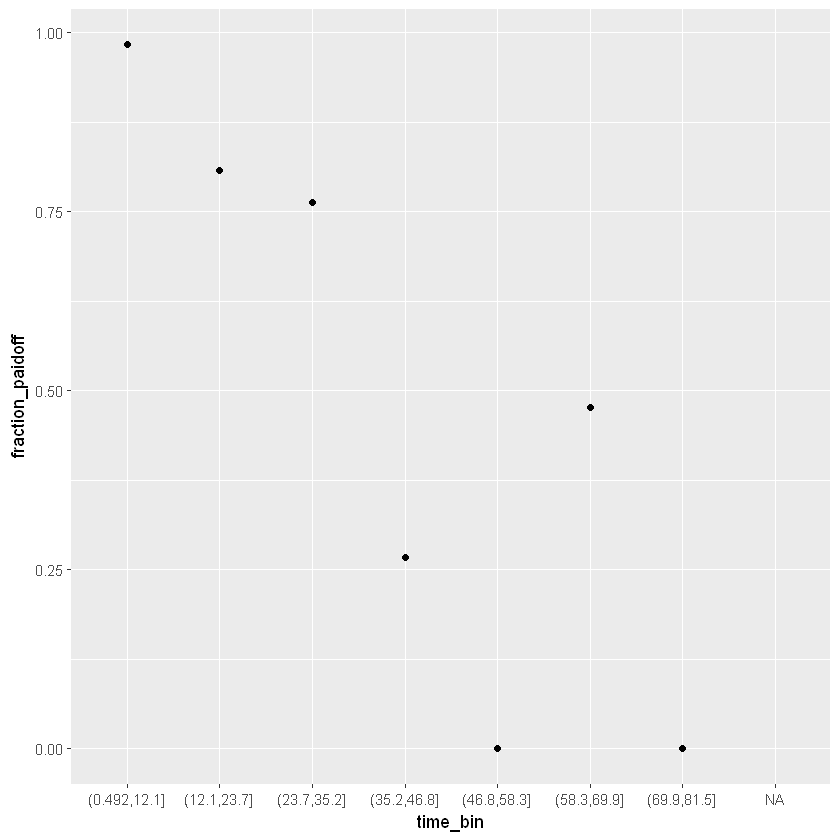

In [77]:
data %>% mutate(time_diff = -1*difftime(lubridate::mdy(effective_date),lubridate::mdy_hm(paid_off_time),units="days") %>% as.numeric ) %>%
    mutate( time_bin = cut(time_diff, breaks = 7)  ) %>%
    group_by(time_bin) %>%
    summarise(
        paidoff_vol = sum(loan_status == 'PAIDOFF'),
        coll_paidoff_vol = sum(loan_status == 'COLLECTION_PAIDOFF'),
        fraction_paidoff = sum(loan_status == 'PAIDOFF') / (
        sum(loan_status == 'PAIDOFF') + sum(loan_status == 'COLLECTION_PAIDOFF'))
    ) %>%
ggplot(aes(x=time_bin,y=fraction_paidoff)) + geom_point()
    


In [ ]:
data %>% mutate(time_diff = difftime(lubridate::mdy(effective_date),lubridate::mdy_hm(paid_off_time),units="days") %>% as.numeric ) %>%
    


In [17]:
data %>% mutate(day_diff = difftime(lubridate::mdy(as.character(effective_date)), lubridate::mdy(as.character(paid_off_time)),  units = "days") %>% as.numeric)

Warning message:
"All formats failed to parse. No formats found."

Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,day_diff
xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NA,45,High School or Below,male,NA
xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NA,50,Bechalor,female,NA
xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NA,33,Bechalor,female,NA
xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NA,27,college,male,NA
xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NA,28,college,female,NA
xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NA,35,Master or Above,male,NA
xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NA,29,college,male,NA
xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NA,36,college,male,NA
xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NA,28,college,male,NA
xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NA,26,college,male,NA


In [ ]:
data %>% mutate(date_diff)